In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

In [3]:
data = pd.read_csv('Data/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [4]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [5]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [10]:
d_data = data.resample('D').mean()
data_exp_1 = exponential_smoothing(d_data['PJME_MW'], 0.05)
df = pd.DataFrame(data_exp_1, index=d_data.index)
df['t'] = 0.0
df.iloc[1:, 1] = df.iloc[:-1, 0].values
df['t1'] = 0.0
df.iloc[2:, 2] = df.iloc[:-2, 0].values
df['t2'] = 0.0
df.iloc[3:, 3] = df.iloc[:-3, 0].values
df['exp_0_01'] = exponential_smoothing(df[0], 0.01)
df['exp_0_03'] = exponential_smoothing(df[0], 0.03)
df['exp_0_08'] = exponential_smoothing(df[0], 0.08)
df['diff1'] = 0.0
df['diff1'].iloc[1:] = df.iloc[:-1,0].values-df.iloc[1:,0].values

In [11]:
df.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.000000
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,-159.040127
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,-163.604787
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,-115.603714
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,55.693138


In [8]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df.tail()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2018-07-30,35241.910443,35362.146957,35530.527499,35584.989473,31331.258351,32789.900996,34732.155158,120.236515
2018-07-31,35206.769087,35241.910443,35362.146957,35530.527499,31370.013458,32862.407039,34770.124272,35.141355
2018-08-01,35407.970216,35206.769087,35241.910443,35362.146957,31410.393026,32938.773934,34821.151948,-201.201129
2018-08-02,35617.223789,35407.970216,35206.769087,35241.910443,31452.461334,33019.127430,34884.837695,-209.253573
2018-08-03,35610.662599,35617.223789,35407.970216,35206.769087,31494.043346,33096.873485,34942.903688,6.561189


In [13]:
def split_data_b( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

train_data, test_data = split_data_b(df, '2016-01-01')

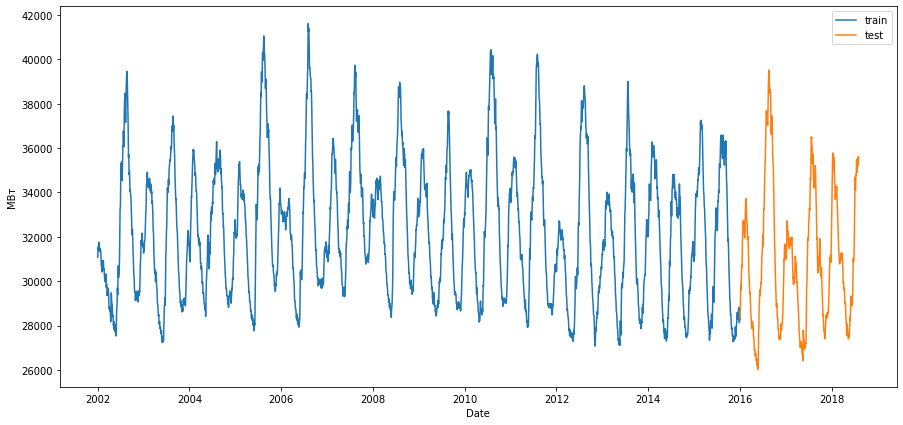

In [16]:
plt.figure(figsize=(15,7))

plt.plot(train_data.index, train_data[df.columns[0]], label='train')
plt.plot(test_data.index, test_data[df.columns[0]], label='test')
plt.xlabel('Date')
plt.ylabel('МВт')
plt.legend()

In [18]:
train_data.head()

,0,t,t1,t2,exp_0_01,exp_0_03,exp_0_08,diff1
Date,,,,,,,,
2002-01-01,31080.739130,0.000000,0.000000,0.000000,31080.739130,31080.739130,31080.739130,0.000000
2002-01-02,31239.779257,31080.739130,0.000000,0.000000,31082.329532,31085.510334,31093.462341,-159.040127
2002-01-03,31403.384044,31239.779257,31080.739130,0.000000,31085.540077,31095.046546,31118.256077,-163.604787
2002-01-04,31518.987759,31403.384044,31239.779257,31080.739130,31089.874554,31107.764782,31150.314611,-115.603714
2002-01-05,31463.294621,31518.987759,31403.384044,31239.779257,31093.608754,31118.430677,31175.353012,55.693138


In [33]:
X_train = train_data.iloc[:-1, :]
y_train = train_data[df.columns[0]].values[1:]
X_test = test_data.iloc[:-1, :]
y_test = test_data[df.columns[0]].values[1:]

In [34]:
model = GradientBoostingRegressor(max_depth=15, random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

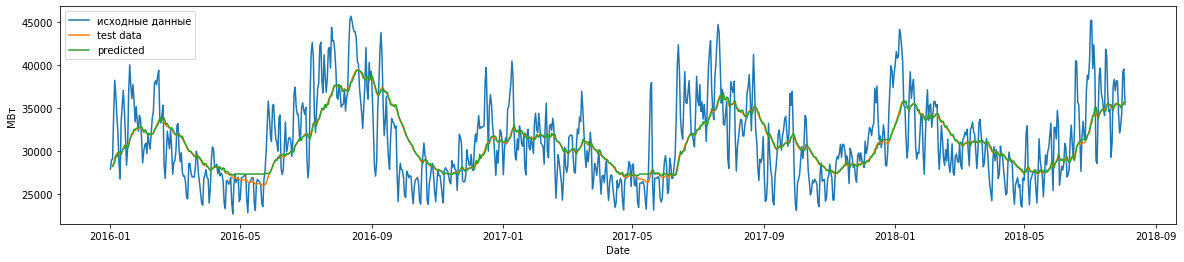

In [36]:
plt.figure(figsize=(20,4))

plt.plot(d_data.loc['2016-01-01':].index, d_data.loc['2016-01-01':]['PJME_MW'], label='исходные данные')
plt.plot(test_data.index[1:], y_test, label='test data')
plt.plot(test_data.index[1:], y_pred, label='predicted')
plt.xlabel('Date')
plt.ylabel('МВт')
plt.legend()

In [37]:
mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(171.53966345869995, 0.9928740691754286, 65913.46078520194)

In [38]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [39]:
mean_absolute_percentage_error(y_test, y_pred)

0.5703843352962439

In [40]:
X_train = train_data.iloc[:-10, :]
y_train = train_data[df.columns[0]].values[10:]
X_test = test_data.iloc[:-10, :]
y_test = test_data[df.columns[0]].values[10:]

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

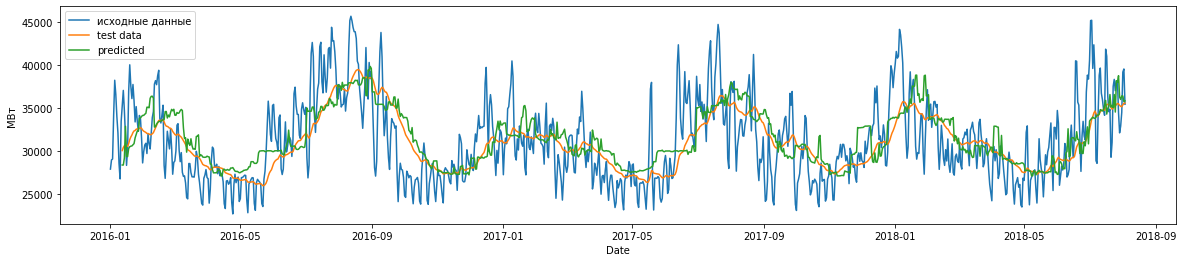

In [41]:
plt.figure(figsize=(20,4))

plt.plot(d_data.loc['2016-01-01':].index, d_data.loc['2016-01-01':]['PJME_MW'], label='исходные данные')
plt.plot(test_data.index[10:], y_test, label='test data')
plt.plot(test_data.index[10:], y_pred, label='predicted')
plt.xlabel('Date')
plt.ylabel('МВт')
plt.legend()

In [42]:
mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(1128.0706725211971, 0.7642857288812012, 2194405.3405856225)

In [43]:
mean_absolute_percentage_error(y_test, y_pred)

3.6730399766366273

При увеличении горизонта прогноза, ошибка модели увеличивается.

4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

    а) Изменение температуры за окном :).
    
    б) Количество денег, которые тратят покупатели в интернет магазине.
    
    в) Вес растущего котенка.
    
    г) Прирост объема деревьев в лесу от времени

а)Сезонный не стационарный. Температура зависит от времени года, однако каждый год есть зависимость от множества других факторов, поэтому дисперсия и среднее могут меняться.
б)С сезоном, не стационарный. Покупки зависят от праздничных дней. Зависимость от конкретной экономической ситуации.
в)С трендом, не стационарный. Вес имеет тенденцию увеличиваться. Среднее очевидно увеличивается со временем.
г)Сезонный. Новые деревья появляются после весны.